# TP2 - Spatial Filtering
ATRIM - Option Datasim

Ecole Centrale Nantes

Diana Mateus

In [20]:
#Edouard GAUTRON et Maria Clara VALLE

Pa

In [3]:
import skimage.io as io
import matplotlib.pyplot as plt
import numpy as np
import os
import math
from skimage.restoration import denoise_bilateral
from skimage.transform import resize, rescale
from scipy import ndimage
from scipy import signal


In [4]:
IMDIR = r"C:\ecn A2\TP2-ATRIM-Spatial Filtering\ATRIM-TP2\images" #nous indiquon le chemin pour acceder aux images


In [5]:
#If using Colab
#from google.colab import drive
#drive.mount('/content/drive')
#IMDIR = "/content/drive/MyDrive/Colab Notebooks/2022-2023 Image Processing/02-spatial-filtering /images/"

Dans un premier temps nous affichons les images


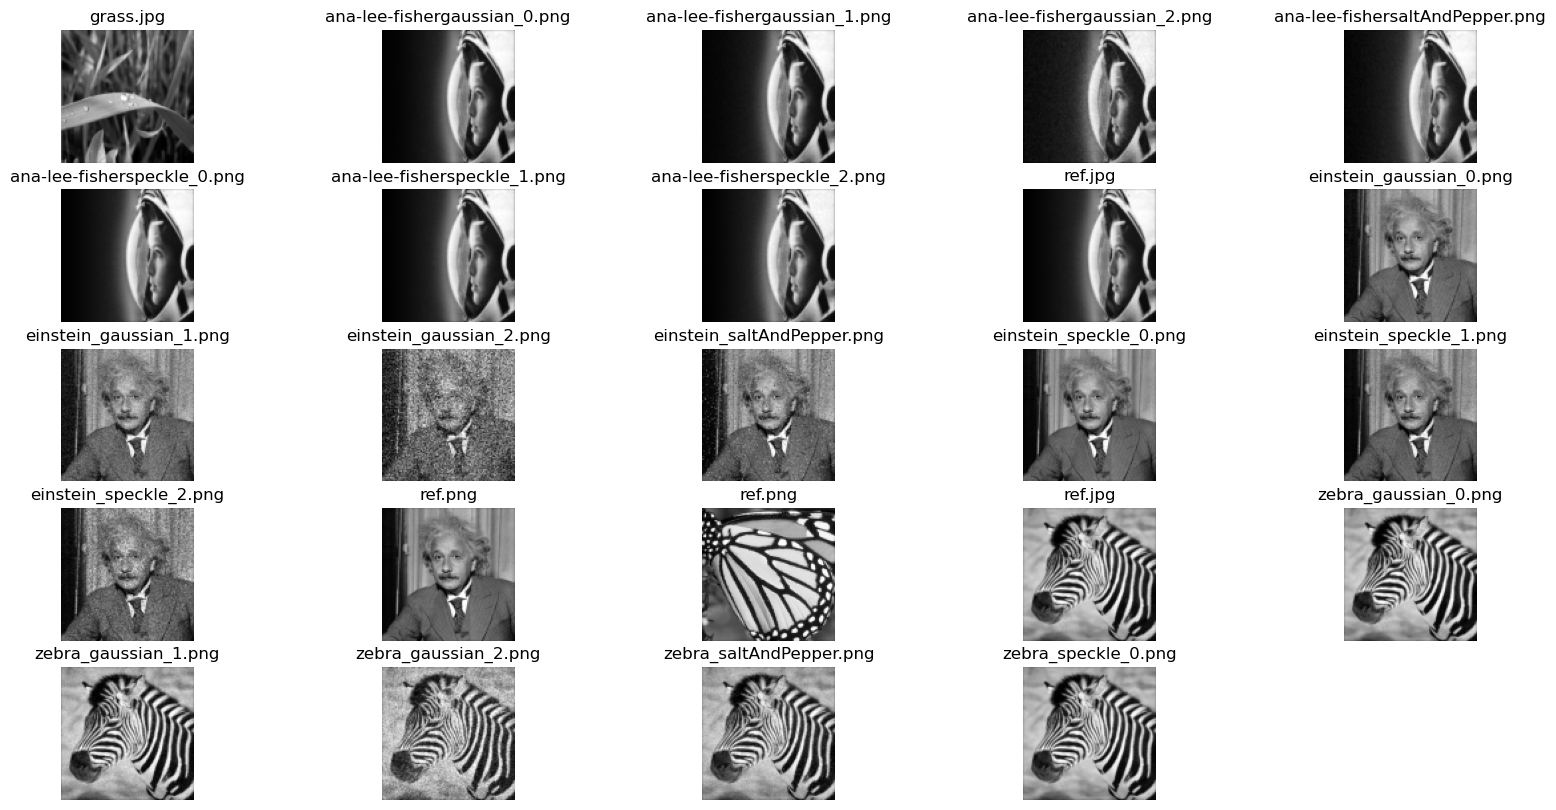

In [7]:
width=20
height=10
plt.rcParams['figure.figsize'] = [width, height]
fig=plt.figure()

im_counter = 1
for root, dirnames, filenames in os.walk(IMDIR):
    for filename in filenames:
        f = os.path.join(root, filename)

    
        if f.endswith(('.png', '.jpg', '.jpeg','.JPG', '.tif', '.gif')):#on selectionne que certains formats d'image

            

            # on va lire les images
            im = io.imread(f,as_gray=True)
            im = resize(im,(100,100),mode='constant')

            # on les affiches
            if im_counter >= 25:
                break;

            plt.subplot(5,5,im_counter)
            plt.imshow(im, cmap='gray')
            plt.title(filename)
            plt.axis('off')
            im_counter +=1



plt.show()




# 1 Linear spatial filtering with convolution




In [12]:
#On va essayer de rendre plus flou les images en applicants differents filtres par dessus

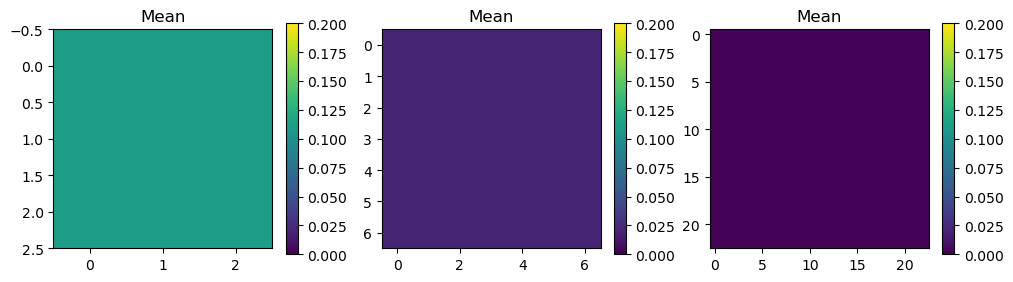

In [13]:
def meanKernel(hs):
    #hs on defini la taille du kernel
    #hs est un entier de la moitier de la taille du kernel
    #on créer un filtre carré de taille 2*hs+1
    kernel = np.zeros((hs*2+1,hs*2+1))
    kernel += 1/(hs*2+1)**2
    return kernel

#on affiche les propriétés
width=12
height=3
plt.rcParams['figure.figsize'] = [width, height]

#on crée et affiche trois differents kernels
k = 1
for hs in [1,3,11]:
    plt.subplot(1,3,k)
    kernel = meanKernel(hs)
    plt.imshow(kernel, vmin=0, vmax=0.2)
    plt.title('Mean')
    plt.colorbar()
    k+=1
plt.show()


Text(0.5, 1.0, 'Mean scipy conv')

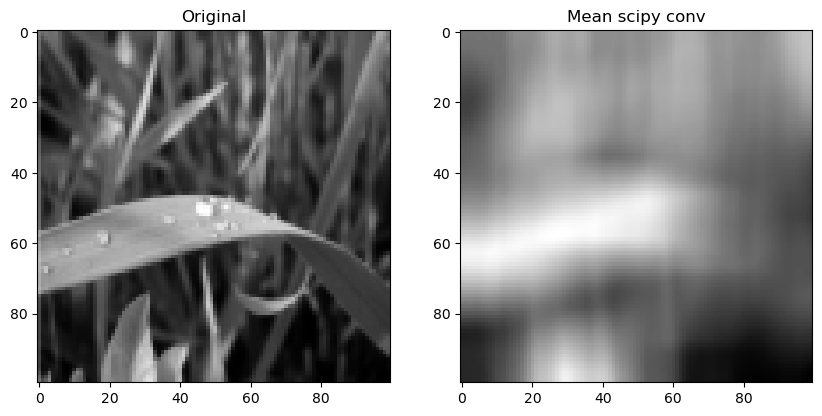

In [14]:
f = os.path.join(IMDIR, "grass.jpg")

#Display properties
width=10
height=5

#Filter parameters
hs = 11 #change le niveau de blur
sigma = 2

# Read and preprocess image
im = io.imread(f, as_gray=True)
im = im.astype(float)
im = resize(im,(100,100))

# Define filter and convolve
kernel = meanKernel(hs)
im_filtered_scipy = ndimage.convolve(im,kernel)

# on affiche l'image originale
fig=plt.figure(figsize=(width, height))
plt.subplot(1,2,1)
plt.imshow(im, cmap = 'gray')
plt.title('Original')

# affichage de l'image resultante
plt.subplot(1,2,2)
plt.imshow(im_filtered_scipy, cmap = 'gray')
plt.title('Mean scipy conv')


## 1.2. Gaussian Kernel
on affiche differents filtres de type Gaussian kernels 

**Question: ** what is the sum of the kernel elements in each case?, why is this necessary?


In [16]:


def gaussianKernel(hs,sigma, normalize=True): 
    # pour crée le kernel on crée une matrice de zero de la meme taille
    kernel = np.zeros((hs*2+1,hs*2+1))
    ax = np.arange(-hs, hs+1)

    # on crée le kernel
    xx, yy = np.meshgrid(ax, ax)

    
    kernel = np.exp(-(xx**2+yy**2)/(2*sigma**2))/(2*np.pi*sigma**2) #on definit le kernel
    

    # on normalise et retourne
    if normalize:
        kernel = kernel / np.sum(kernel)

    return kernel

In [17]:
ax = np.arange(-3, 3+1)
xx, yy = np.meshgrid(ax, ax)
print(yy)
#  meshgrid est une fonction permetant de parcourir une matrice, en combiant tout les parametres

[[-3 -3 -3 -3 -3 -3 -3]
 [-2 -2 -2 -2 -2 -2 -2]
 [-1 -1 -1 -1 -1 -1 -1]
 [ 0  0  0  0  0  0  0]
 [ 1  1  1  1  1  1  1]
 [ 2  2  2  2  2  2  2]
 [ 3  3  3  3  3  3  3]]


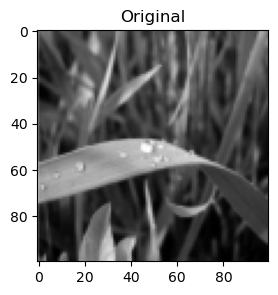

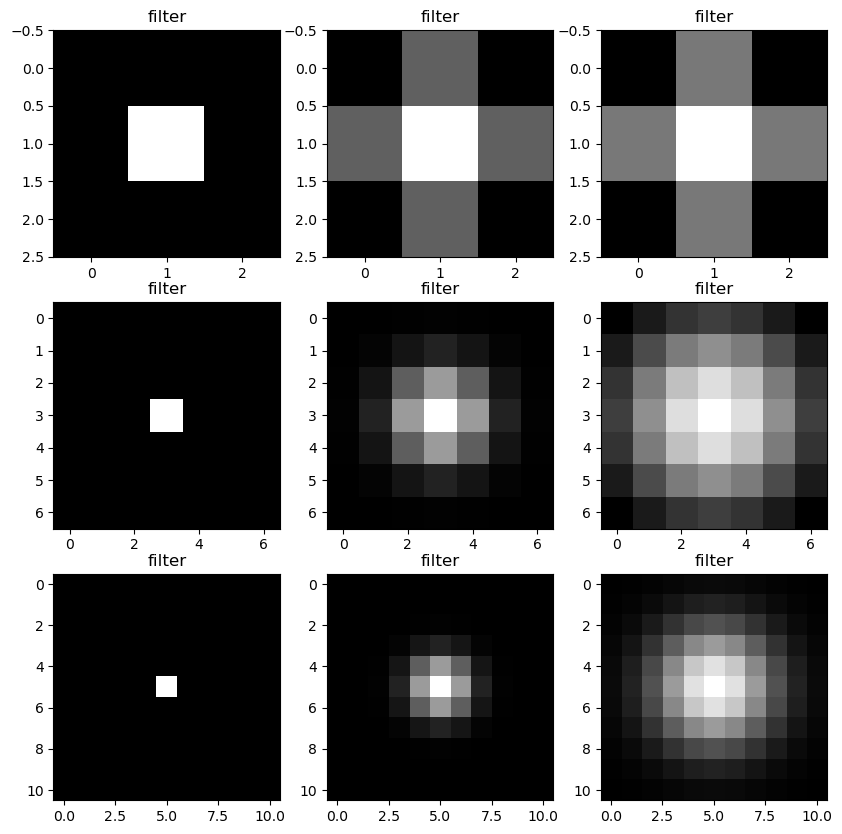

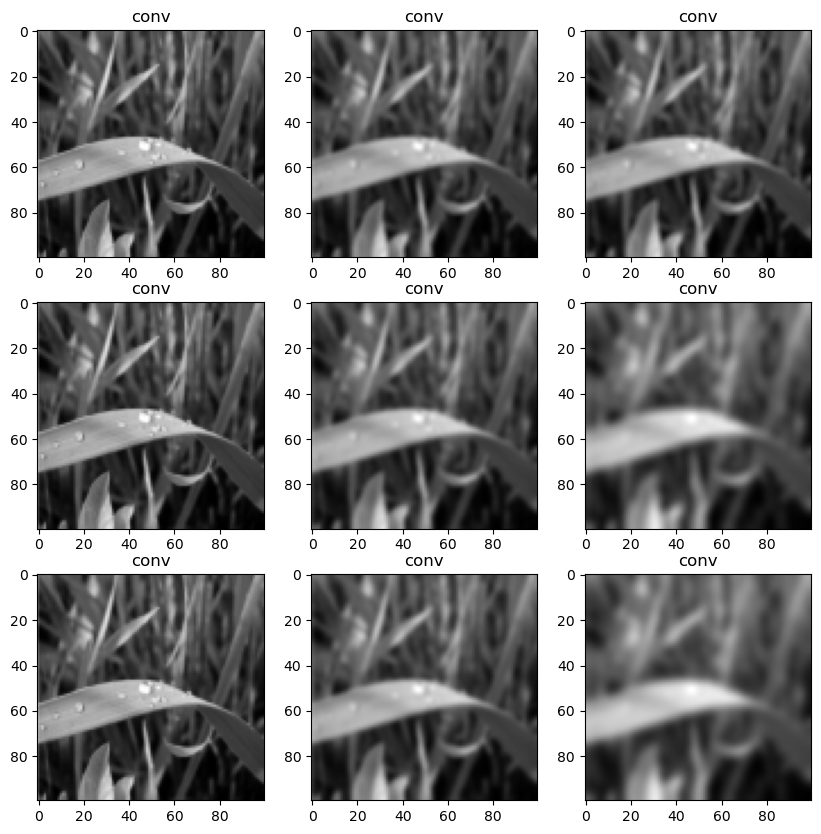

In [18]:
f = os.path.join(IMDIR, "grass.jpg")

#Display size
width=10
height=10
iter_filter = 1
iter_conv = 1
filters = []

# Read and preprocess image
im = io.imread(f, as_gray=True)
im = im.astype(float)
im = resize(im,(100,100))

# Display the original image
fig=plt.figure(figsize=(3, 3))
plt.imshow(im, cmap = 'gray')
plt.title('Original')

# Don definit les differents parametres pour les differents filtres
filter_sizes=[1,3,5]
sigma_values=[0.1,1,2]

# dans un premier temps on affiche les filtres
fig=plt.figure(figsize=(width, height))

#FILL IN
for hs in filter_sizes:
    for sigma in sigma_values:
        filter = gaussianKernel(hs,sigma, normalize=True)
        plt.subplot(3,3,iter_filter)
        plt.imshow(filter, cmap = 'gray')
        plt.title("filter")

        iter_filter += 1
        filters.append(filter)

plt.show()

# Convolve the image with the filter and display the filtered image
fig=plt.figure(figsize=(width, height))

for kernel in filters:
    #print(kernel)
    #print('prochaine')
    #print(np.sum(kernel[::2]))
    conv = ndimage.convolve(im,kernel)#on fait la convolution pour appliquer les filtres aux images
    plt.subplot(3,3,iter_conv)
    plt.imshow(conv, cmap = 'gray')
    plt.title("conv")
    iter_conv += 1
plt.show()

# ainsi on peut observer l'affichage des trois filtres, qui n'ont pas tous la meme taille ni le meme sigma, 
# on s'attend donc a des resultats differents.
# on observe que plus la taille du filtre est grande et le sigma grand plus l'image est floue






# On applique notre propre filtre

**c)** **Write down your findings**, notably the reasons for any possible difference with the in-built implementation.

**d)** Why and how can the convolution can be written as a matrix multiplication? why is it interesting?


In [23]:
def myConvolution(imsource,kernel):

    # Find image and kernel sizes
    im_shape = imsource.shape
    imh,imw = im_shape[0], im_shape[1]
    kh,kw = kernel.shape
    print(kh)
    delta_h=int((kh-1)/2)
    delta_w=int((kw-1)/2)

    print(delta_h)
    # on elargie l'image avec des zeros autour car le filtre a une certaine taille qui depasse donc de la matrice si il passe le long des bords
    imPadded = np.zeros((imh+2*delta_h,imw+2*delta_w))
    imPadded[delta_h:imh+delta_h,delta_w:imw+delta_w] = imsource
    

    # Create an empty image to store the result
    imDest = np.zeros((imh,imw))

    
    for i in range(imh):
        for j in range(imw): # on parcour la matrice par les lignes et colones
            #for u in range(kh):
             #   for v in range(kw):

                   # imDest[i,j] += kernel[u , v]*imPadded[i +2*delta_h- u, j +2*delta_h- v]

            imPatch = imPadded[i:i+kh, j:j+kw]
            imDest[i,j] = np.sum(imPatch*np.flip(kernel))


    #END FILL IN
    return imDest


23
11


Text(0.5, 1.0, 'Convole')

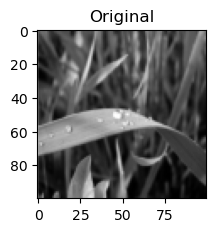

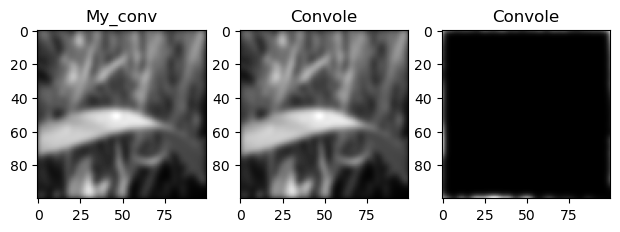

In [27]:
f = os.path.join(IMDIR, "grass.jpg")

#Display properties
width=10
height=10

# Read and preprocess image
im = io.imread(f, as_gray=True)
im = im.astype(float)
im = resize(im,(100,100))

# Display the original image
fig=plt.figure(figsize=(width, height))
plt.subplot(1,4,1)
plt.imshow(im, cmap = 'gray')
plt.title('Original')

# Define filter parameters
hs = 11
sigma = 2
kernel = gaussianKernel(hs,sigma)


# Convolve and display the filtered image
conv = myConvolution(im,kernel)
fig=plt.figure(figsize=(width, height))
plt.subplot(1,4,2)
plt.imshow(conv, cmap = 'gray')
plt.title('My_conv')

conv_2 = ndimage.convolve(im,kernel)
plt.subplot(1,4,3)
plt.imshow(conv, cmap = 'gray')
plt.title('Convole')

dif = conv_2 - conv

plt.subplot(1,4,4)
plt.imshow(dif, cmap = 'gray')
plt.title('Convole')

# Maintenant on va comparer notre solution pour appliquer le filtre avec la convolution
# pour cela on applique les deux methode et on soustrait les deux matrices obtenues, pour mettre en valeure des differences
# Apres avoir fait cette difference on remarque une image noir ce qui montre qu'il n'y a pas de difference, a part sur les bords 
# cela provient probablement de impadded

## On etudie les filtres derivés


In [72]:
# Pour se faire on créer differents kernels associé a chaque opération

def sobel_x():
    kernel = np.zeros((3,3))
    kernel = [[1, 0, -1],
             [2, 0, -2],
             [1 ,0, -1]]
    return kernel

def sobel_y():
    kernel = np.zeros((3,3))
    kernel = [[1, 2, 1],
             [0, 0, 0],
             [-1 ,-2, -1]]
    return kernel


def laplacian():

    kernel = [[0, 1, 0],
             [1, -4, 1],
             [0, 1, 0]]

    return kernel

def normalize(im):
    im = (im-im.min())/(im.max()-im.min())
    return im


Text(0.5, 1.0, 'laplace')

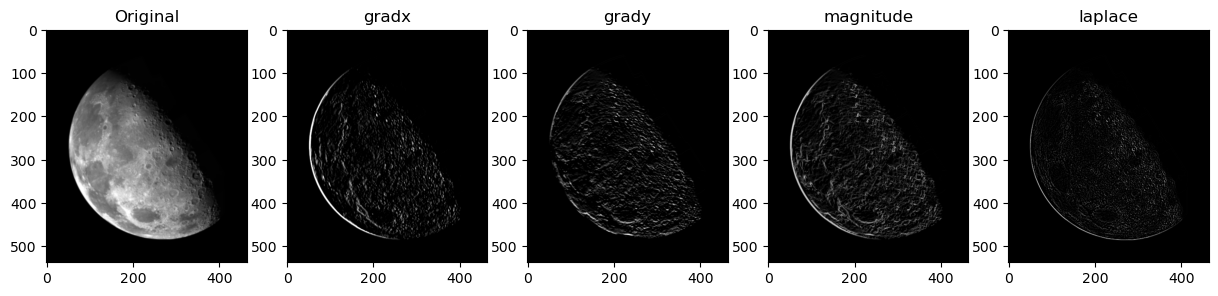

In [73]:
f = os.path.join(IMDIR, "enhance/moon-blurred.tif")
#f = os.path.join(IMDIR, "ascentB.png")

#Display properties
width=15
height=5

# Read and preprocess image
im = io.imread(f, as_gray=True)
im = im.astype(float)
im = normalize(im)
#im = resize(im,(100,100))

# Display the original image
fig=plt.figure(figsize=(width, height))
plt.subplot(1,5,1)
plt.imshow(im, cmap = 'gray')
plt.title('Original')

# Convolve and display the filtered and the enhanced image
im_filtered_x =  ndimage.convolve(im,sobel_x())
im_filtered_x =  np.clip(im_filtered_x, 0, 1) #sature l'image entre 0 et 1
im_filtered_y =  ndimage.convolve(im,sobel_y())
im_filtered_y =  np.clip(im_filtered_y, 0, 1)
im_filtered_laplace =  ndimage.convolve(im, laplacian())
im_filtered_laplace  =  np.clip(im_filtered_laplace, 0, 1)

plt.subplot(1,5,2)
plt.imshow(im_filtered_x, cmap = 'gray')
plt.title('gradx')
plt.subplot(1,5,3)
plt.imshow(im_filtered_y, cmap = 'gray')
plt.title('grady')

norme = np.sqrt(im_filtered_x**2+im_filtered_y**2)
plt.subplot(1,5,4)
plt.imshow(norme, cmap = 'gray')
plt.title('magnitude')

plt.subplot(1,5,5)
plt.imshow(im_filtered_laplace, cmap = 'gray')
plt.title('laplace')

# On observe differents resultatts selon les filtres utilisés notaments selon le sens de la derivé qui ne mets pas en valeur les memes particumarités 
# de la lune l'un les bords et l'autre les crateres, on remarque que pour le cas de la lune le laplacien efface les crateres et ne
# laisse place qu'au contour


# 2 Non linear filtering


## 2.1 Correlation: Finding Charlie

Use patch-wise Normalized Cross Correlation (NCC) to automatically find Waldo (Charlie) in an image. To this end, look for the template image (``charlie-template``) inside ``marche-crop`` or the ``marche`` images. As the process can be long start with the cropped version, you might also find it useful to **create a separate notebook for this task only** as it is memory consuming. Evaluate the NCC expression from the slides (described in the non-local means advance filtering) to compare the template with every location in the target image, store the results and retrieve the location with the highest NCC score. Draw this location on the target image.

**Describe the process assumptions and limitations**

Hint: Start from your convolution operation but apply locally normalized correlation at each pixel



## 2.2 Bilateral Filter  

**a)** Implement your own version of the ``bilateral`` filter and compare its results vs. scikit ``denoise_bilateral`` function.

**b)** Compare and comment the bilateral results versus the mean and gaussian filter for the ``zebra`` group of images of the ``bilateral`` folder


In [ ]:
from skimage.restoration import denoise_bilateral
#im_filtered_scipy = denoise_bilateral(im, win_size=hs*2+1, sigma_color=0.05, sigma_spatial=15)
